In [1]:
#Import Libraries 

import os 
import csv 
from pathlib import Path 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the Required Dependencies 
import pandas as pd 
import numpy as np 

## Importing the Dataset

In [3]:
#collect the data 

data = pd.read_csv('Q1_data.csv')
#data.head()
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Look at Boxplot for Outliers 

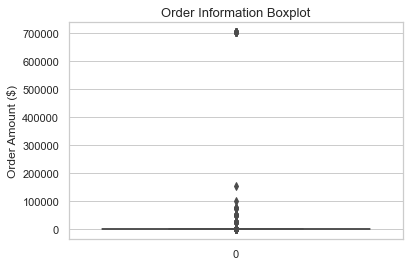

In [22]:
sns.set()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = data['order_amount'])
plt.title('Order Information Boxplot', size=13)
plt.savefig('Q1_BoxPlot.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.ylabel('Order Amount ($)')
plt.show()

In [5]:
df= data[data['order_amount'] > 10000]
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


## First Average Order Value (AOV) Calculation

In [6]:
order_amount_sum = data['order_amount'].sum()
total_items_sum = data['total_items'].sum() 

AOV = order_amount_sum / total_items_sum
print('The Average Order Value is:', '${:,.2f}'.format(AOV))

The Average Order Value is: $357.92


## Remove Outliers & Re-calculate AOV

In [7]:
#since average sneaker prices range from $70 to 250$, we will calculate the ratio between total order cost 
# and total items to find the average cost of each item. 
#To be safe, if the average cost of the item in a specific data entry > $300, we will remove it


In [8]:
df_new = data['order_amount'] / data['total_items']

#add it to the exisiting df 

data['item_cost_avg'] = df_new
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost_avg
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [18]:
#remove all rows in which item_cost_avg > $300

df_final = data[data['item_cost_avg'] < 350]
df_final

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost_avg
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [19]:
order_amount_final = df_final['order_amount'].sum()
total_items_final = df_final['total_items'].sum() 

AOV_final = order_amount_final / total_items_final
print('The Average Order Value is:', '${:,.2f}'.format(AOV_final))

The Average Order Value is: $150.40


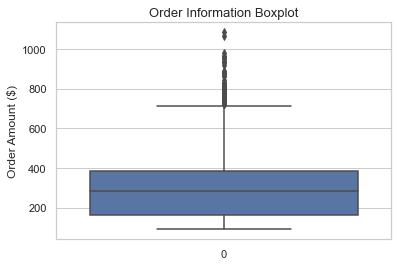

In [21]:
sns.set()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = df_final['order_amount'])
plt.title('Order Information Boxplot', size=13)
plt.savefig('Q1_BoxPlot_2.jpg', dpi=300, format='jpg', bbox_inches = 'tight', transparent='false')
plt.ylabel('Order Amount ($)')
plt.show()

## Incorrect AOV Calculation from Question

* This calculation is done to make sure that the AOV value provided in the question was calculated via the following incorrect process 

In [11]:
order_amount_inc = data['order_amount'].sum()
total_item_inc = data['order_amount'].count()

AOV_inc = order_amount_inc / total_item_inc
print('The Incorrect Average Order Value is:', '${:,.2f}'.format(AOV_inc))

The Incorrect Average Order Value is: $3,145.13
